##**Meta Finanzas datos históricos 2017- 2023 de las Empesas de Ecuador**

**Librerias necesarias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Conectamos con Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importamos los datos financieros de los años 2017- 2023**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Grupo_4IA/Datos Financieros Historicos.csv', index_col = 'Date', parse_dates=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-13,65010002,65190002,64570000,64709999,20100000
2017-03-14,64529999,64550003,64150002,64410004,14280200
2017-03-15,64550003,64919998,64250000,64750000,24833800
2017-03-16,64750000,64760002,64300003,64639999,20674300
2017-03-17,64910004,65239998,64680000,64870003,49219700
...,...,...,...,...,...
2023-03-06,256429993,260119995,255979996,256869995,24109800
2023-03-07,256299988,257690002,253389999,254149994,21473200
2023-03-08,254039993,254539993,250809998,253699997,17340200


**Visualizamos Volumen de Rentabilidad Financiera años 2017- 2023**

<AxesSubplot:title={'center':'Rentabilidad Financieras de Ecuador 2017-2023'}, xlabel='Date'>

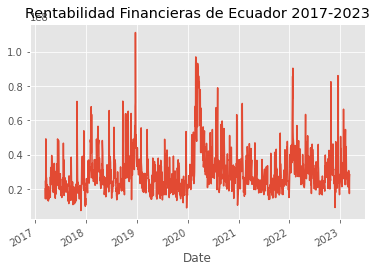

In [ ]:
plt.style.use('ggplot')
df['Volume'].plot(label='CLOSE',title='Rentabilidad Financieras de Ecuador 2017-2023')

In [ ]:
x_rawVS = df.iloc[:,:-1]
y_rawVS = df.iloc[:,4:6]

In [ ]:
x_rawVS.head(3)

,Open,High,Low,Close
Date,,,,
2017-03-13,65010002,65190002,64570000,64709999
2017-03-14,64529999,64550003,64150002,64410004
2017-03-15,64550003,64919998,64250000,64750000


In [ ]:
y_rawVS.head(3)

,Volume
Date,
2017-03-13,20100000
2017-03-14,14280200
2017-03-15,24833800


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

In [ ]:
X = ss.fit_transform(x_rawVS)
y = mm.fit_transform(y_rawVS)

In [ ]:
X_train =  X[:200,:]
X_test = X[200:,:]
y_train = y[:200,:]
y_test = y[200:,:]

In [ ]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 4) (200, 1)
Testing Shape (1310, 4) (1310, 1)


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable 

In [ ]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [ ]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

In [ ]:
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 4]) torch.Size([200, 1])
Testing Shape torch.Size([1310, 1, 4]) torch.Size([1310, 1])


In [ ]:
class LSTM_Model(nn.Module):
  def __init__(self,num_classes, input_size, hidden_size, num_layers, seq_length) -> None:
    super(LSTM_Model,self).__init__()
    self.num_classes = num_classes
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.seq_lengh = seq_length
    self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size,
                          num_layers=self.num_layers, batch_first=True)
    self.fc1 = nn.Linear(self.hidden_size,128)
    self.fc2 = nn.Linear(128,self.num_classes)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
    output, (hn, cn) = self.lstm(x, (h_0, c_0))
    hn = hn.view(-1, self.hidden_size)
    out = self.relu(hn)
    out = self.fc1(out)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
num_epochs = 10000
learning_rate = 0.005

input_size = 4 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes
seq_length = X_train_tensors_final.shape[1]

In [ ]:
modelZFOX = LSTM_Model(num_classes, input_size, hidden_size, num_layers, seq_length)

## **4. Usar MSE para el error**

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(modelZFOX.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  outputs = modelZFOX.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #calculate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.12910
Epoch: 100, loss: 0.00650
Epoch: 200, loss: 0.00650
Epoch: 300, loss: 0.00650
Epoch: 400, loss: 0.00650
Epoch: 500, loss: 0.00650
Epoch: 600, loss: 0.00649
Epoch: 700, loss: 0.00649
Epoch: 800, loss: 0.00649
Epoch: 900, loss: 0.00649
Epoch: 1000, loss: 0.00649
Epoch: 1100, loss: 0.00649
Epoch: 1200, loss: 0.00649
Epoch: 1300, loss: 0.00649
Epoch: 1400, loss: 0.00649
Epoch: 1500, loss: 0.00649
Epoch: 1600, loss: 0.00649
Epoch: 1700, loss: 0.00649
Epoch: 1800, loss: 0.00649
Epoch: 1900, loss: 0.00649
Epoch: 2000, loss: 0.00649
Epoch: 2100, loss: 0.00649
Epoch: 2200, loss: 0.00649
Epoch: 2300, loss: 0.00648
Epoch: 2400, loss: 0.00648
Epoch: 2500, loss: 0.00648
Epoch: 2600, loss: 0.00647
Epoch: 2700, loss: 0.00647
Epoch: 2800, loss: 0.00646
Epoch: 2900, loss: 0.00650
Epoch: 3000, loss: 0.00674
Epoch: 3100, loss: 0.00641
Epoch: 3200, loss: 0.00637
Epoch: 3300, loss: 0.00634
Epoch: 3400, loss: 0.00630
Epoch: 3500, loss: 0.00637
Epoch: 3600, loss: 0.00622
Epoch: 3700, 

In [ ]:
#todos los Xs
df_X_ss = ss.transform(df.iloc[:, :-1]) #old transformers
df_y_mm = mm.transform(df.iloc[:, -1:]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

## **Grafique real vs predecido en el tiempo**

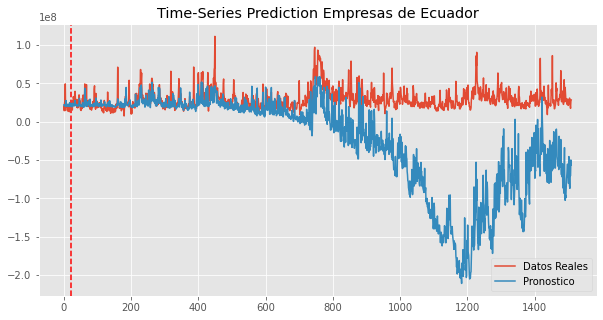

In [ ]:
import matplotlib.pyplot as plt             #visualisation

train_predict = modelZFOX(df_X_ss)#prediccion

data_predict = train_predict.data.numpy() #convertir de tensor a numpy 
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,5)) #plotting
plt.axvline(x=20, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Datos Reales') #actual plot
plt.plot(data_predict, label='Pronostico') #predicted plot
plt.title('Time-Series Prediction Empresas de Ecuador')
plt.legend()
plt.show()

In [ ]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2017-03-19')
datetime_object

datetime.datetime(2017, 3, 19, 0, 0)

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2017-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2017-03-25,64209999,65029999,64870003,64980003
1,2017-03-28,64870003,64980003,65099998,65290001
2,2017-03-29,64980003,65099998,65290001,65470001
3,2017-03-30,65099998,65290001,65470001,65709999
4,2017-03-31,65290001,65470001,65709999,65860001
...,...,...,...,...,...
1253,2022-03-17,276440002,287149994,294390015,295220001
1254,2022-03-18,287149994,294390015,295220001,300429993
1255,2022-03-21,294390015,295220001,300429993,299160004
1256,2022-03-22,295220001,300429993,299160004,304059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1258,), (1258, 3, 1), (1258,))

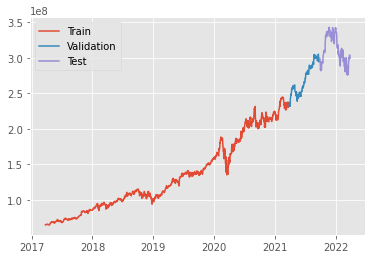

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])